### Importing all the required libraries

In [1]:
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import argparse
import imutils
import cv2


Using TensorFlow backend.


### Getting required parameter as input from user

In [2]:
model = "./model/LungCancer.model"
image = "./data/testing/cancer2.png"

### Loading test image

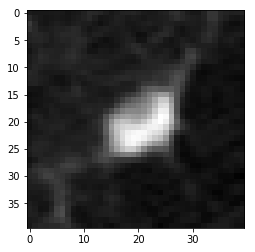

In [3]:
image = cv2.imread(image)
orig = image.copy()
plt.imshow(image)
plt.show()

### pre-process the image

In [4]:
image = cv2.resize(image, (40, 40))
image = image.astype("float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)


### Loading the trained model

In [5]:
print("Loading network...")
model = load_model(model)


Loading network...


### Predicting the image

In [11]:
score = model.predict(image)[0]
label = model.predict_classes(image)[0]
if label == 0:
    label = "No Cancer"
    level = ''
else:
    label = "Cancer"
    if max(score) >= 0.98:
        level = "Final stage"
    elif 0.96 <= max(score) <= 0.98:
        level = "Third stage"
    elif 0.94 <= max(score) <= 0.96:
        level = "Second stage"
    else:
        level = "First stage"

### Drawing the label on the image

In [12]:
proba = max(score)
print("Confidence score is {0:.2f}%".format(proba*100))
output = imutils.resize(orig, width=400)
if proba*100 > 95:
    out = "{}: {:.2f}%".format(label, proba * 100) 
    color = (0,255,0)
else:
    out = "{}".format("Not recognised")
    color = (255,0,0)
text = cv2.putText(output, out, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)

Confidence score is 99.83%


### Showing the output

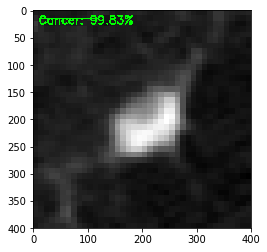

The level of the cancer is Final stage


In [13]:
plt.imshow(output)
plt.show()
if level:
    print("The level of the cancer is %s"%level)